In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import json
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

In [2]:
# Dictionnaire des départements
departements = json.load(open('departements.json','r'))['DEPARTMENTS']
pre = json.load(open('departements.json','r'))['Preposition']
leg = json.load(open('departements.json','r'))['Legende']

In [3]:
def plotTests(df, dep, rolling=True):
    fig, ax = plt.subplots(figsize=(14,10))
    if not rolling:
        rolling_mean = df
        post = ''
    else:
        rolling_mean = df[['P','T']].rolling(7).mean()
        post = ' - Moyenne sur 7 jours'
    converted_dates = matplotlib.dates.datestr2num(df['jour'].to_list())
    ax.plot_date(converted_dates, rolling_mean['P'], '-', label='Tests positifs')
    ax.set_ylabel('Nombre de tests positifs')
    plt.xticks(rotation=45, ha='right')
    ax2 = ax.twinx()
    ax2.plot_date(converted_dates, 100*rolling_mean['P']/rolling_mean['T'], '-', color='red', label='Taux de positivité')
    ax2.set_ylabel('Taux de positivité (%)')
    #ax2.set_yscale('log')
    fig.legend()
    if dep in departements.keys():
        ax.set_title('Suivi des tests COVID-19 {}{}{}'.format(pre[dep], departements[dep], post))
    else:
        ax.set_title('Suivi des tests COVID-19 en {}{}'.format(dep, post))

In [4]:
def plotEvol(df, var, dep, rolling=True):
    if not rolling:
        rolling_mean = df[var]
        post = ''
    else:
        rolling_mean = df[var].rolling(7).mean()
        post = ' - Moyenne sur 7 jours'
    converted_dates = matplotlib.dates.datestr2num(df['jour'].to_list())
    plt.plot_date(converted_dates, rolling_mean, '-')
    plt.ylabel(leg[var])
    plt.xticks(rotation=45, ha='right')
    if dep in departements.keys():
        plt.title('COVID-19: {} {}{}\n{}'.format(leg[var], pre[dep], departements[dep], post))
    else:
        plt.title('COVID-19: {} en {}\n{}'.format(leg[var], dep, post))   

In [5]:
def plotTestsVsAge(df, dep):
    opts = {'cmap': 'Reds'}
    plt.rcParams['figure.figsize'] = (20, 10)

    age_group = {
                '9' : '0-9',
                '19' : '10-19',
                '29' : '20-29',
                '39' : '30-39',
                '49' : '40-49',
                '59' : '50-59',
                '69' : '60-69',
                '79' : '70-79',
                '89' : '80-89',
                '90' : '>90'
    }

    p_vs_age = []
    for key, val in age_group.items():
        df_tmp = df[df['cl_age90']==int(key)]
        rolling_mean = df_tmp[['P','T']].rolling(7).mean()
        p_vs_age.append( (100*rolling_mean[::-7][::-1].iloc[1:]['P']/rolling_mean[::-7][::-1].iloc[1:]['T']).to_list() )

    dates = df_tmp[::-7][::-1]['jour'].iloc[1:].to_list()
    plt.pcolor(p_vs_age, **opts)
    plt.colorbar()
    xt = plt.xticks(ticks=np.arange(len(dates))+0.5, labels=dates, rotation=45, ha='right')
    ylabels = [val for key, val in age_group.items()]
    yt = plt.yticks(ticks=np.arange(len(ylabels))+0.5, labels=ylabels)
    plt.ylabel('Age')
    if dep in departements.keys():
        plt.title('Taux de positivité des tests COVID-19 {}{} - Moyenne sur 7 jours'.format(pre[dep], departements[dep]))
    else:
        plt.title('Taux de positivité des tests COVID-19 en {} - Moyenne sur 7 jours'.format(dep))

In [6]:
# France entière
df_fra = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/dd0de5d9-b5a5-4503-930a-7b08dc0adc7c', sep=';', dtype={'dep':str})
df_dep = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675', sep=';', dtype={'dep':str})

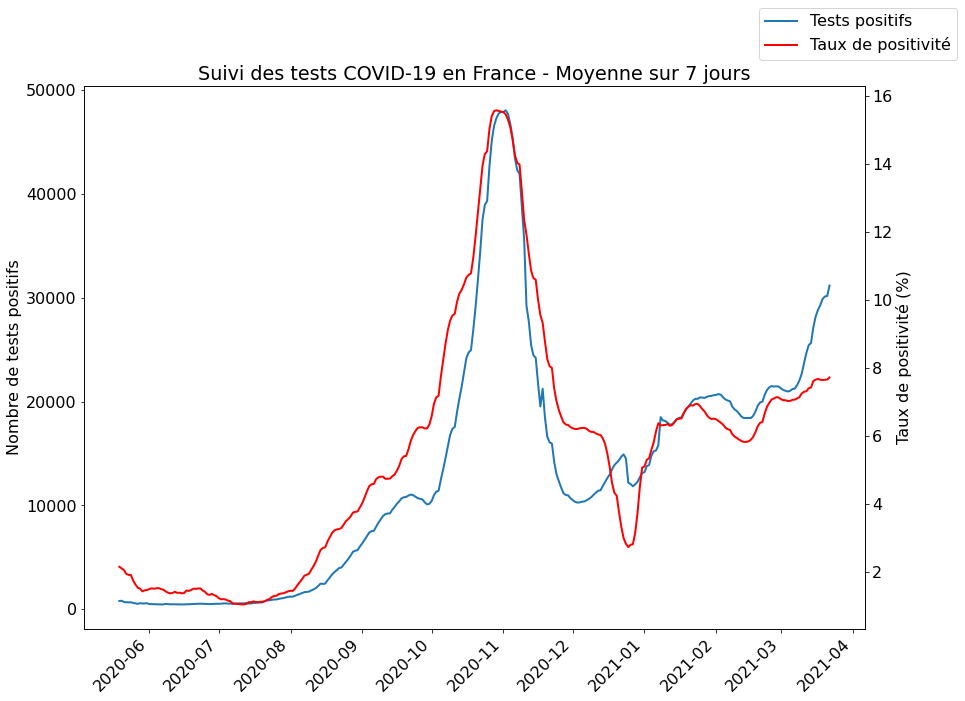

In [7]:
df_fra_all = df_fra[df_fra['cl_age90']==0]
#plotTests(df_fra, 'France', rolling=False)
plotTests(df_fra_all, 'France', rolling=True)

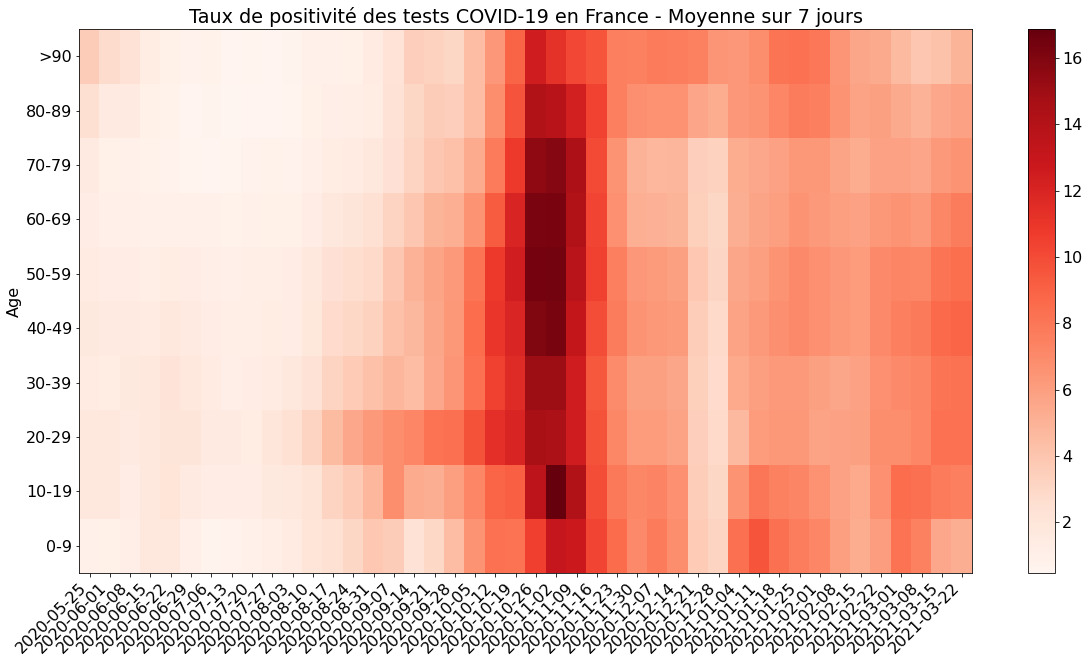

In [8]:
plotTestsVsAge(df_fra, 'France')

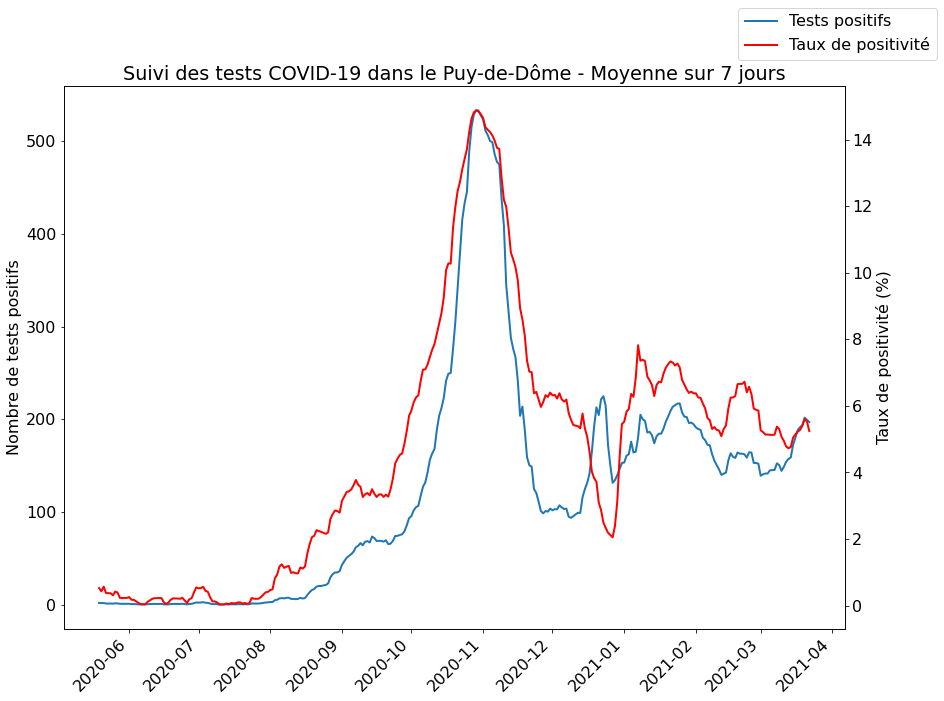

In [9]:
# Département spécifique
dep = '63'
df_dep_sel = df_dep[df_dep['dep']==dep]
df_dep_all = df_dep_sel[df_dep_sel['cl_age90']==0]
#plotTests(df_dep_all, dep, rolling=False)
plotTests(df_dep_all, dep)

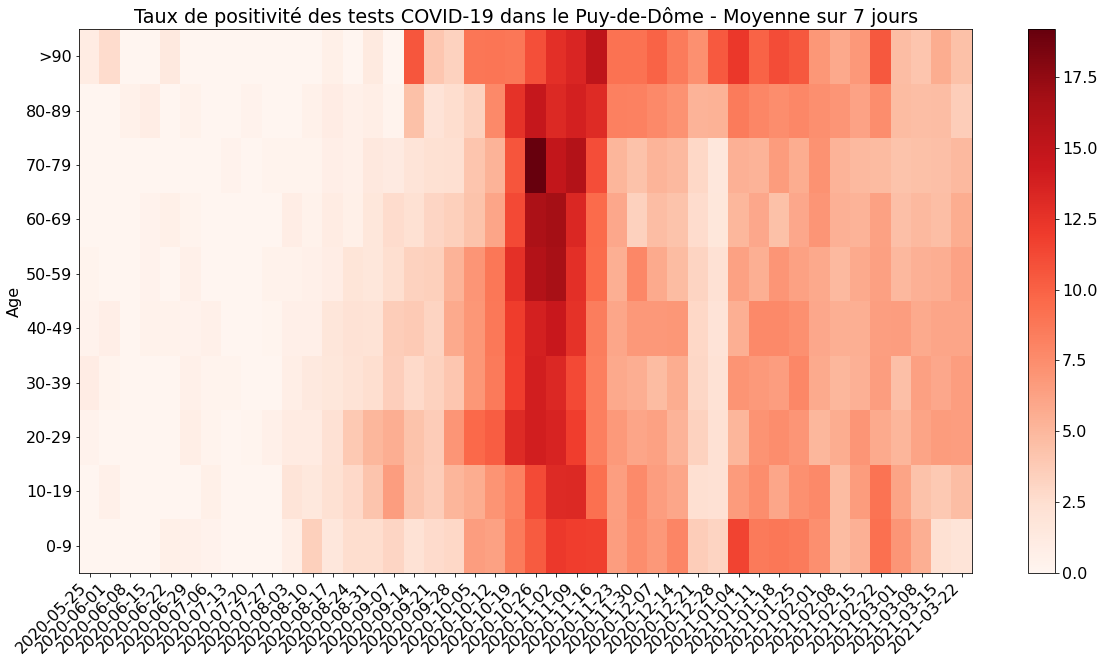

In [10]:
plotTestsVsAge(df_dep_sel, dep)

In [11]:
df_dep_all.tail(20)

,dep,jour,P,T,cl_age90,pop
220846,63,2021-03-03,185,2969,0,660240.0
220857,63,2021-03-04,151,3383,0,660240.0
220868,63,2021-03-05,156,3872,0,660240.0
220879,63,2021-03-06,121,1916,0,660240.0
220890,63,2021-03-07,30,378,0,660240.0
220901,63,2021-03-08,231,3772,0,660240.0
220912,63,2021-03-09,180,3569,0,660240.0
220923,63,2021-03-10,141,3020,0,660240.0
220934,63,2021-03-11,181,4470,0,660240.0
220945,63,2021-03-12,195,5445,0,660240.0


In [12]:
df_hop = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7', sep=';', dtype={'dep':str})
df_hop = df_hop[df_hop['sexe']==0]
jour = df_hop['jour'].unique()

plt.rcParams["figure.figsize"] = [20, 9]

In [14]:
df_hop['jour'].unique()

array(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
       '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
       '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
       '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
       '2020-05-17', '2020-05-18', '2020-05-19', '2020-

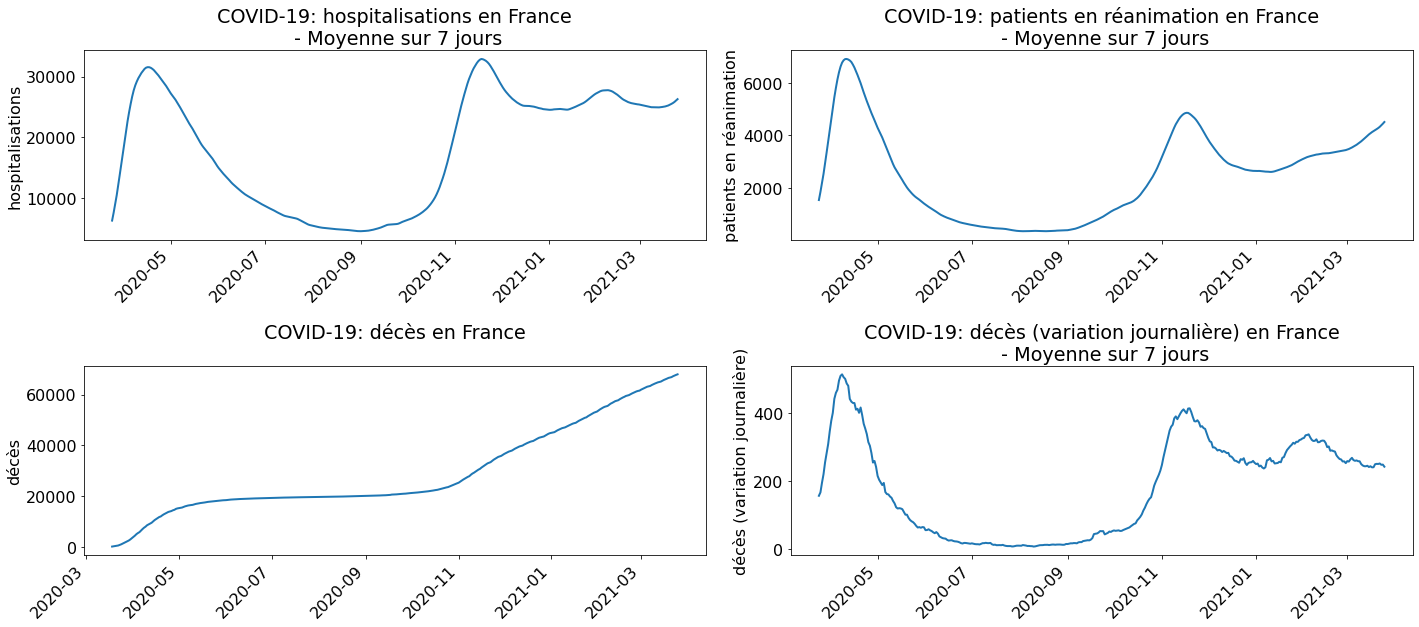

In [13]:
# France entière
a = [ df_hop[df_hop['jour']==j][['hosp','rea','rad','dc']].sum(axis=0) for j in jour ]
new_df = pd.DataFrame(data=a)
new_df['jour'] = jour
new_df['dc_jour'] = np.diff(new_df['dc'], prepend=0)

mask = [True, True, False, True]

for i, var in enumerate(['hosp', 'rea', 'dc', 'dc_jour']):
    plt.subplot(2, 2, i+1)
    plotEvol(new_df, var, 'France', rolling=mask[i])
plt.tight_layout()

In [14]:
new_df.tail(20)

,hosp,rea,rad,dc,jour,dc_jour
353,24625,3689,264909,63270,2021-03-06,170
354,24818,3743,265295,63400,2021-03-07,130
355,25195,3849,266096,63759,2021-03-08,359
356,25201,3918,267539,64057,2021-03-09,298
357,24969,3918,269019,64321,2021-03-10,264
358,24858,3992,270433,64586,2021-03-11,265
359,24749,4033,271678,64809,2021-03-12,223
360,24671,4070,272615,64978,2021-03-13,169
361,24989,4127,272960,65118,2021-03-14,140
362,25469,4219,273771,65451,2021-03-15,333


<ipython-input-15-6c480ca2b032>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hop_dep['dc_jour'] = np.diff(df_hop_dep['dc'], prepend=0)


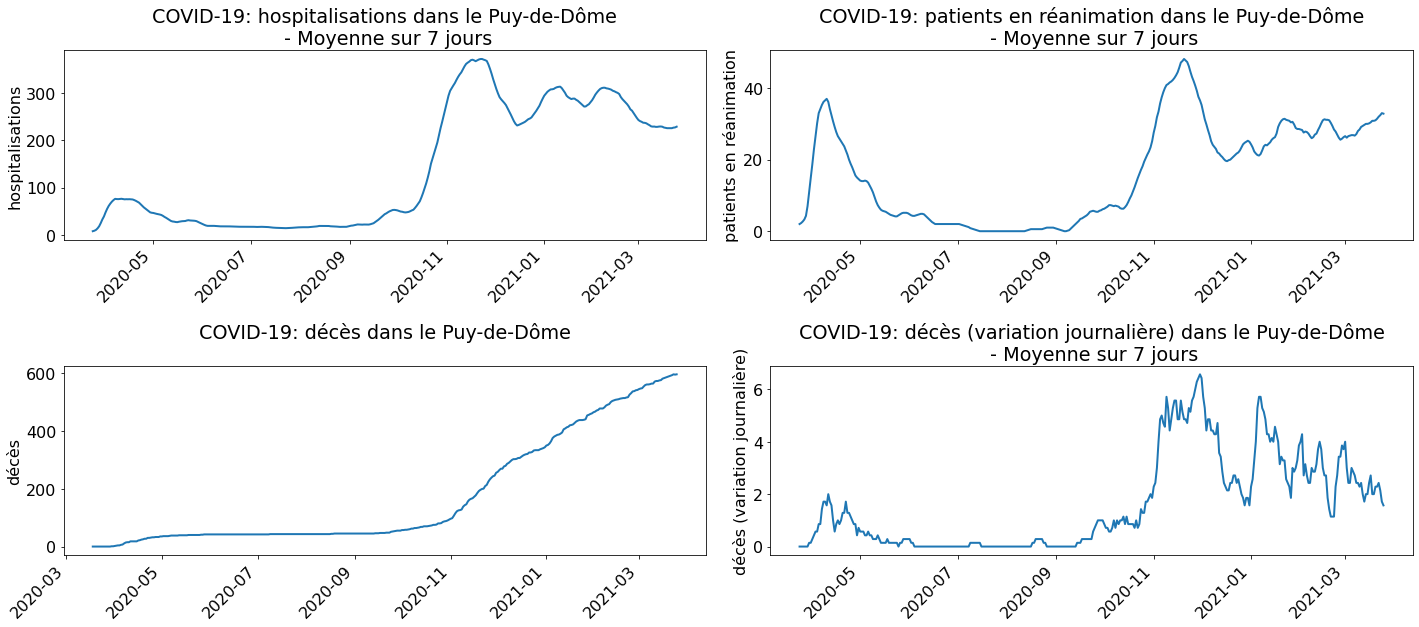

In [15]:
# Département spécifique
dep = '63'
df_hop_dep = df_hop[df_hop['dep']==dep]
df_hop_dep['dc_jour'] = np.diff(df_hop_dep['dc'], prepend=0)

for i, var in enumerate(['hosp', 'rea', 'dc', 'dc_jour']):
    plt.subplot(2, 2, i+1)
    plotEvol(df_hop_dep, var, dep, rolling=mask[i])
plt.tight_layout()